## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
data_df= pd.merge(study_results, mouse_metadata, on = "Mouse ID")
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice in the DataFrame
data_df['Mouse ID'].value_counts()

g989    13
w914    10
b879    10
m550    10
q511    10
        ..
x336     1
h428     1
b447     1
v199     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
double_mice_data = data_df.set_index('Mouse ID','Timepoint')
double_mouse = double_mice_data.loc['g989', :]
double_mouse.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = double_mice_data.drop(index = 'g989')
clean_data_df = clean_mice_data.reset_index()
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data_df['Mouse ID'].value_counts()

w914    10
w350    10
a203    10
y478    10
r701    10
        ..
h428     1
d133     1
t573     1
o848     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
tumor_summary_stats = clean_data_df.groupby('Drug Regimen').agg(\
        # mean
        tumor_mean=('Tumor Volume (mm3)', np.mean),\
        # median
        tumor_median=('Tumor Volume (mm3)', np.median),\
        # variance
        tumor_var=('Tumor Volume (mm3)', np.var),\
        # standard deviation
        tumor_std=('Tumor Volume (mm3)', np.std),\
        # standard error of measurement (SEM)
        tumor_sem=('Tumor Volume (mm3)', st.sem)\
).round(3)

tumor_summary_stats

/Users/Antonia/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Antonia/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Antonia/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,tumor_mean,tumor_median,tumor_var,tumor_std,tumor_sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar Plots

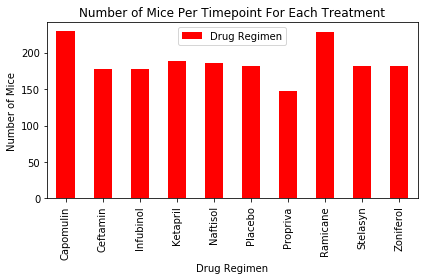

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_vs_treatment = clean_data_df.groupby('Drug Regimen')

mice_vs_treatment = pd.DataFrame(mice_vs_treatment['Drug Regimen'].count())

bar_chart = mice_vs_treatment.plot(kind='bar', title="Number of Mice Per Timepoint For Each Treatment", color="red")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Mice")
plt.tight_layout()
plt.savefig("PandaBarChart.png")

plt.show()

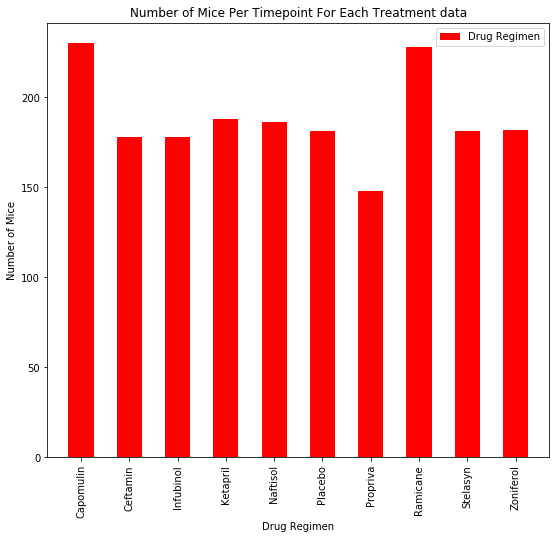

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_vs_treatment))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(9,8))
plt.bar(x_axis, mice_vs_treatment["Drug Regimen"], color='red', align="center", width = 0.52)
plt.xticks(tick_locations, list(mice_vs_treatment.index), rotation="vertical")

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(mice_vs_treatment["Drug Regimen"])*1.05)
plt.title("Number of Mice Per Timepoint For Each Treatment data")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.savefig("PyplotBarChart.png")

plt.show()

## Pie Plots

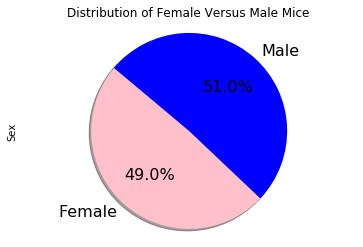

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female = clean_data_df.groupby('Sex')
male_female = pd.DataFrame(male_female['Sex'].count())

male_female.plot(kind='pie', y='Sex', title="Distribution of Female vs Male Mice",startangle=140, autopct='%1.1f%%',shadow=True, fontsize=16, colors =["pink","blue"],legend =False)
plt.axis("equal")
plt.savefig("PandaPieChart.png")
plt.show()

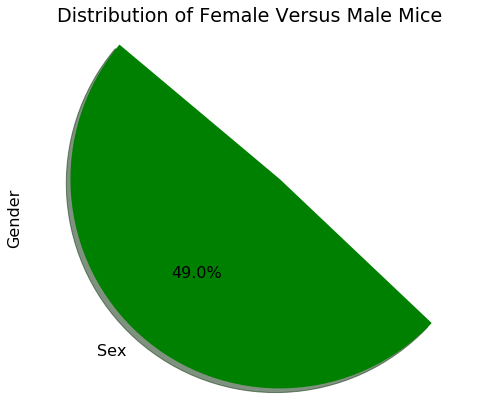

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = clean_data_df.groupby('Sex')
male_female = pd.DataFrame(male_female['Sex'].count())

sex_count = male_female['Sex']
colors = ["green", "blue"]

plt.pie(sex_count, labels=male_female, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Gender")
plt.axis("equal")
plt.savefig("PyplotPieChart.png")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = clean_data_df[clean_data_df['Drug Regimen'].isin(four_drugs)]

four_drugs

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [21]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
last_tumor = four_drugs.get(['Mouse ID','Drug Regimen']).agg(\
    size_last_tumor=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

last_tumor
last_tumor_unstack = last_tumor.stack(level=0).unstack(level=0)

TypeError: aggregate() missing 1 required positional argument: 'func'

In [23]:
count = 0

for drug in four_drugs:
    quartiles = last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
if count == 0:
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    count += 1

KeyError: 'Mouse ID'

## Line and Scatter Plots

/Users/Antonia/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Antonia/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Antonia/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


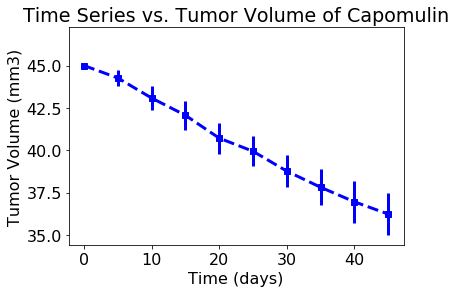

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
capomulin.head()

capomulin_tumor = capomulin.groupby(['Timepoint']).agg(\
    tumor_vol_mean=('Tumor Volume (mm3)', np.mean),\
    tumor_vol_sem=('Tumor Volume (mm3)', st.sem)\
).round(3)

time_series = list(capomulin_tumor.index.values)

plt.errorbar(time_series, capomulin_tumor['tumor_vol_mean'], yerr=capomulin_tumor['tumor_vol_sem'], label="Time Series of Tumor Volume for Capomulin", fmt="bs--", linewidth=3)
plt.title("Time Series vs. Tumor Volume of Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)") 
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(capomulin_tumor['tumor_vol_mean'])*0.95, max(capomulin_tumor['tumor_vol_mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]
plt.savefig("LineChart.png")

plt.show()

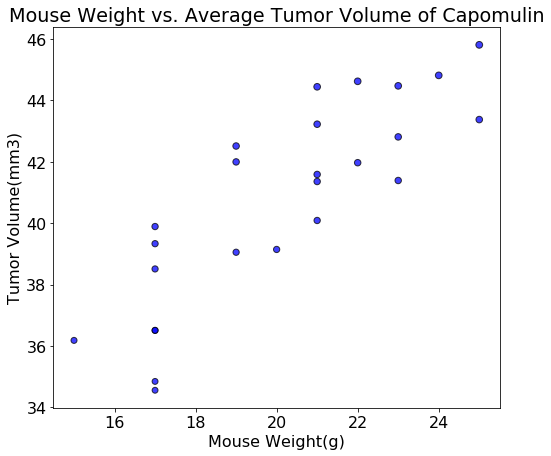

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight = capomulin.groupby(['Mouse ID']).agg(\
        mouse_weight=('Weight (g)', np.mean),\
        tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)

plt.scatter(
    capomulin_weight['mouse_weight'],
    capomulin_weight['tumor_vol_mean'],
    marker='o',
    facecolors='blue',
    edgecolors='black',
    s=capomulin_weight['tumor_vol_mean'],
    alpha=.75)
plt.title("Mouse Weight vs. Average Tumor Volume of Capomulin")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.savefig("Scatter-WeightAvgTumorVol.png")

plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_weight['mouse_weight'],capomulin_weight['tumor_vol_mean'])
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


The r-squared value is: 0.8419461020261081
The linear regression equation is: y = 0.95x + 21.55


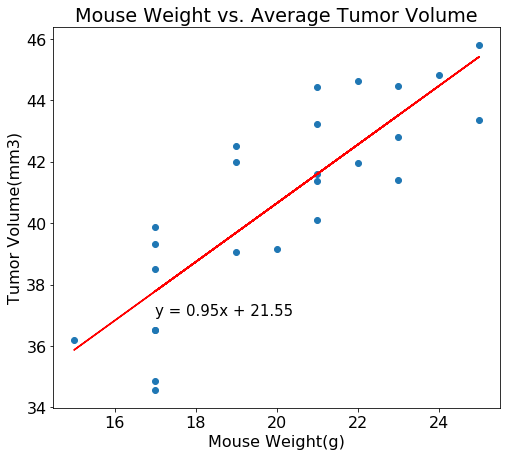

In [20]:
x_values = capomulin_weight['mouse_weight']
y_values = capomulin_weight['tumor_vol_mean']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
print(f"The r-squared value is: {rvalue}")
print(f"The linear regression equation is: {line_eq}")
plt.savefig("Scatter-WeightAvgTumorVolRegression.png")

plt.show()